In [1]:
import h5py 
import os 
import math 
import numpy as np
import struct as st
from PIL import Image
import uuid
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import makro_utils as mu

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
ops.reset_default_graph() 
#Architecture
X = tf.placeholder(dtype = tf.float32, shape = (None, 784),name = 'inputs')

dense1 = tf.layers.dense(inputs = X, units = 392, activation = 'relu', name = 'dense1')

sigma =  tf.layers.dense(inputs = dense1, units = 40, activation = 'sigmoid', name = 'sigma')
mu    =  tf.layers.dense(inputs = dense1, units = 40, activation = 'sigmoid', name = 'mu')

z     =  mu + sigma*tf.random.normal(tf.shape(mu), 0, 1, dtype = tf.float32)

dense2 = tf.layers.dense(inputs = z, units = 392, activation = 'relu', name = 'dense2')
dense3 = tf.layers.dense(inputs = z, units = 784, activation = 'sigmoid', name = 'dense3')

print(X.shape)
print(dense1.shape)
#print(sigma.shape)
#print(mu.shape)
print(z.shape)
print(dense2.shape)
print(dense3.shape)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
(?, 784)
(?, 392)
(?, 40)
(?, 392)
(?, 784)


In [4]:
#Defining loss function
reconstructed_image = dense3
reconstruction_loss = tf.reduce_mean(tf.square(X - reconstructed_image))
KL_divergence =  tf.reduce_mean(tf.square(mu) + tf.square(sigma) - tf.log(1e-8 + tf.square(sigma)) - 1)
loss = reconstruction_loss + 0.001*KL_divergence

In [5]:
#Training operation
learning = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

Step 1, Loss: 0.234394
KL loss: 0.9834774
rec_loss: 0.2334107


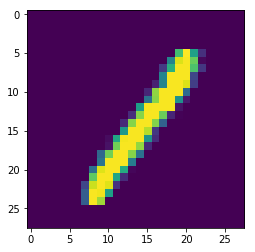

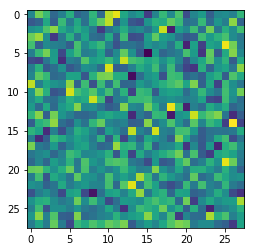

Step 1000, Loss: 0.068023
KL loss: 1.1069559
rec_loss: 0.0669159


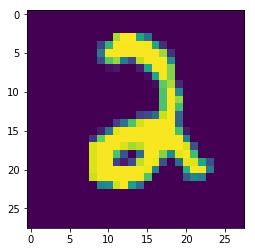

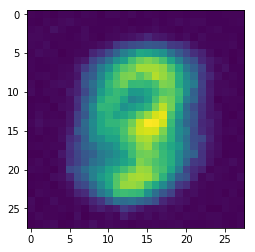

Step 2000, Loss: 0.069930
KL loss: 1.0652596
rec_loss: 0.06886517


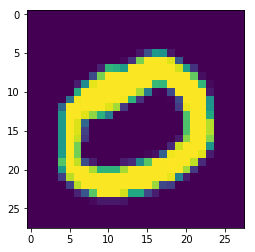

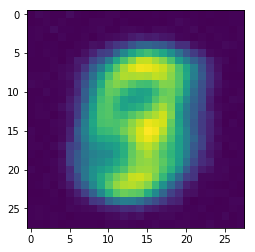

Step 3000, Loss: 0.068230
KL loss: 1.0430548
rec_loss: 0.067186855


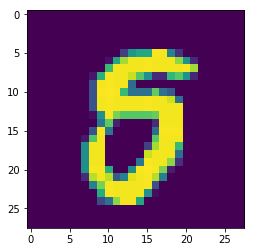

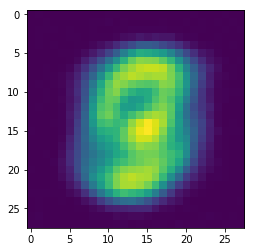

Step 4000, Loss: 0.070945
KL loss: 1.032595
rec_loss: 0.06991287


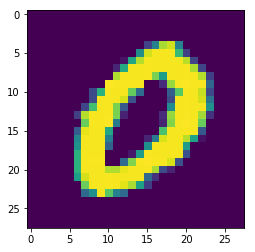

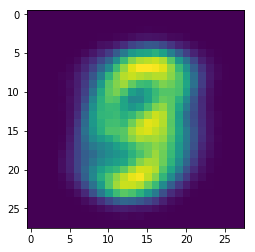

Step 5000, Loss: 0.054884
KL loss: 1.8116516
rec_loss: 0.05307223


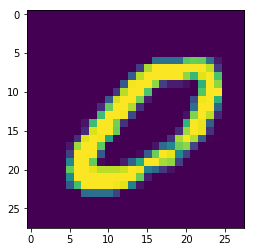

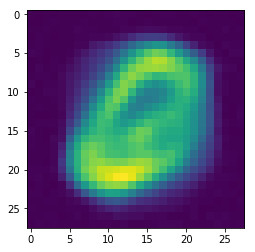

Step 6000, Loss: 0.043881
KL loss: 2.5822043
rec_loss: 0.041298363


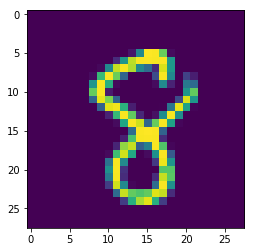

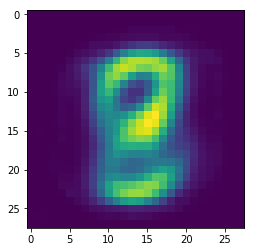

Step 7000, Loss: 0.036366
KL loss: 2.8857481
rec_loss: 0.033480268


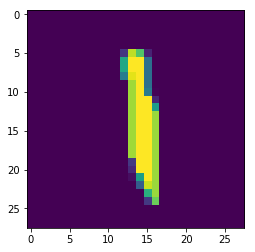

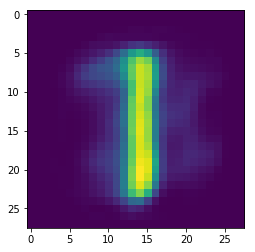

Step 8000, Loss: 0.029339
KL loss: 3.347529
rec_loss: 0.025991585


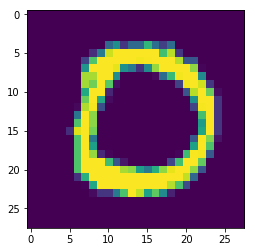

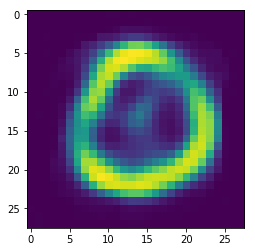

Step 9000, Loss: 0.029079
KL loss: 3.638063
rec_loss: 0.025440883


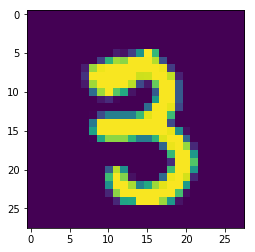

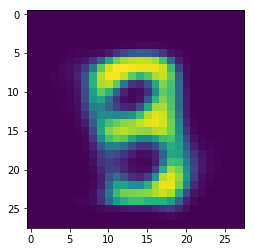

Step 10000, Loss: 0.023386
KL loss: 3.9313424
rec_loss: 0.019454708


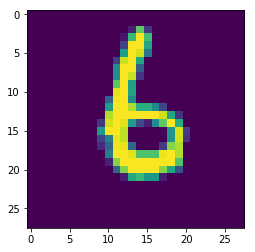

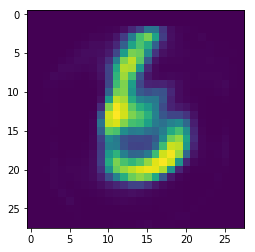

Step 11000, Loss: 0.022098
KL loss: 4.211548
rec_loss: 0.017886927


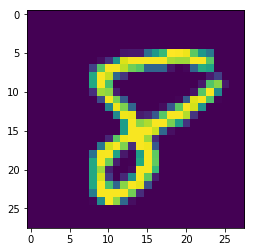

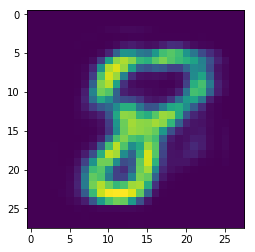

Step 12000, Loss: 0.020594
KL loss: 4.447015
rec_loss: 0.016146528


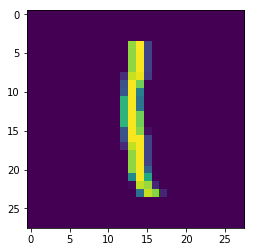

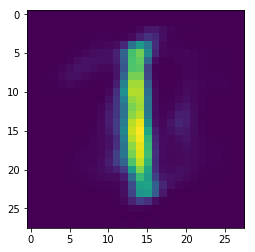

Step 13000, Loss: 0.018556
KL loss: 4.5172987
rec_loss: 0.01403867


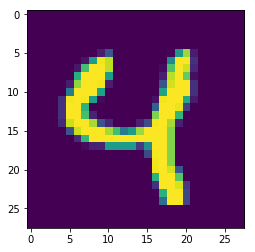

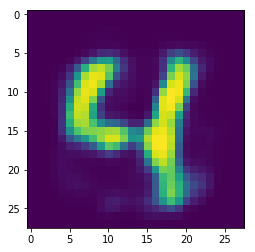

Step 14000, Loss: 0.019883
KL loss: 4.719617
rec_loss: 0.015163676


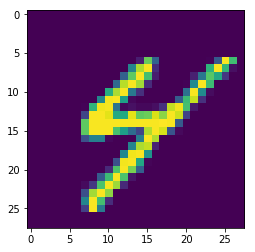

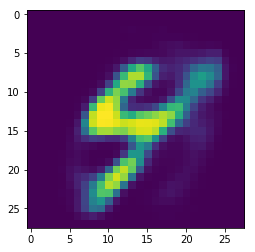

Step 15000, Loss: 0.018909
KL loss: 4.852904
rec_loss: 0.014056568


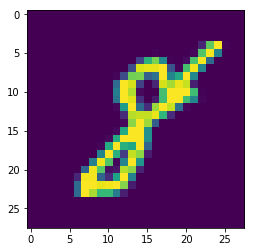

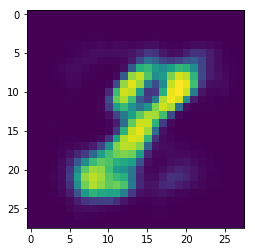

Step 16000, Loss: 0.017086
KL loss: 4.9877877
rec_loss: 0.012098335


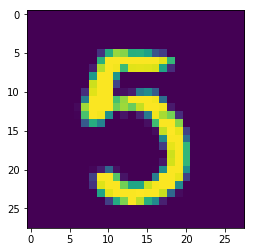

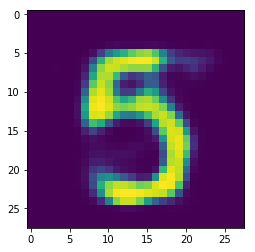

Step 17000, Loss: 0.016665
KL loss: 4.9296303
rec_loss: 0.011735037


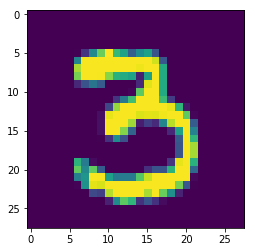

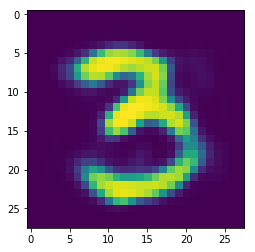

Step 18000, Loss: 0.016761
KL loss: 5.0196652
rec_loss: 0.011741328


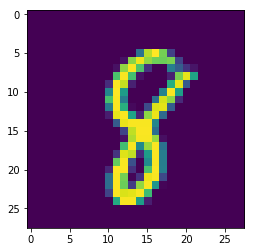

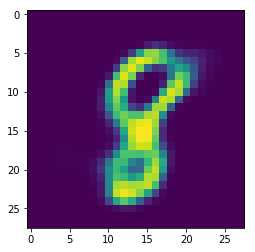

Step 19000, Loss: 0.017064
KL loss: 4.9847994
rec_loss: 0.012079246


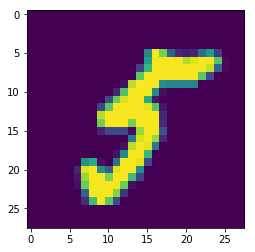

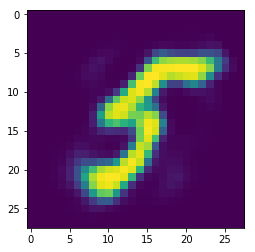

Step 20000, Loss: 0.016209
KL loss: 5.0290008
rec_loss: 0.011180203


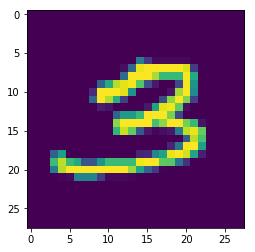

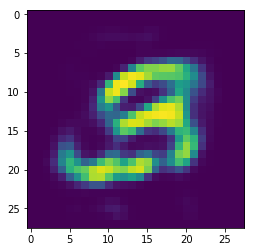

Step 21000, Loss: 0.016432
KL loss: 5.0762315
rec_loss: 0.011356084


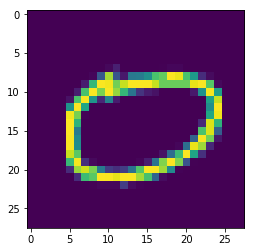

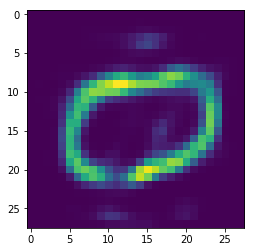

Step 22000, Loss: 0.015420
KL loss: 5.063793
rec_loss: 0.010356224


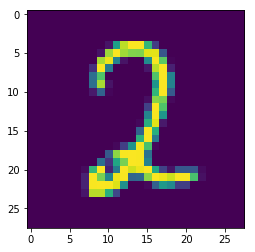

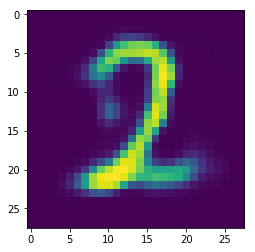

Step 23000, Loss: 0.016101
KL loss: 5.175988
rec_loss: 0.010925004


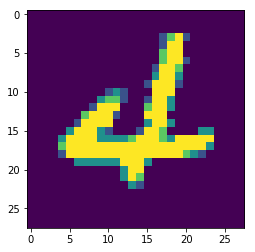

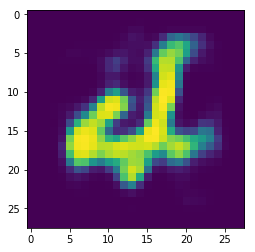

Step 24000, Loss: 0.016171
KL loss: 5.1859093
rec_loss: 0.010985035


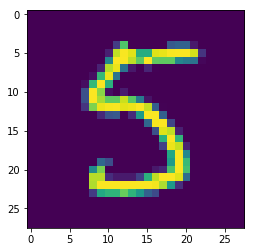

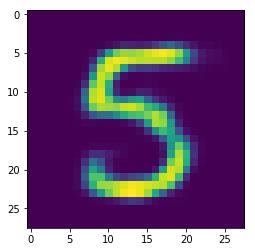

Step 25000, Loss: 0.015468
KL loss: 5.1494465
rec_loss: 0.010318803


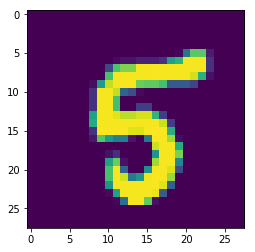

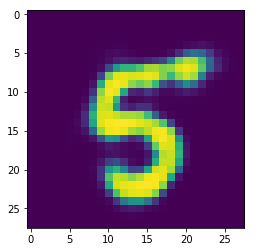

Step 26000, Loss: 0.015248
KL loss: 5.3864846
rec_loss: 0.00986181


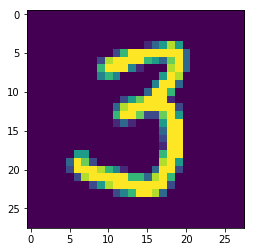

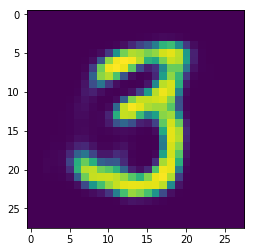

Step 27000, Loss: 0.015575
KL loss: 5.320815
rec_loss: 0.010254633


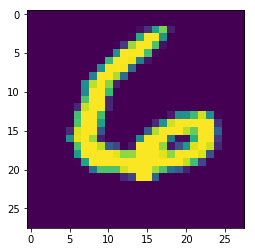

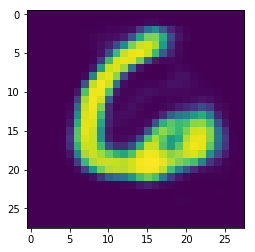

Step 28000, Loss: 0.014672
KL loss: 5.316847
rec_loss: 0.009355056


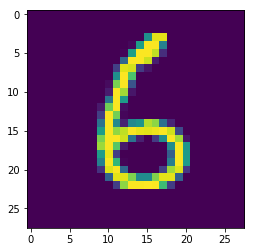

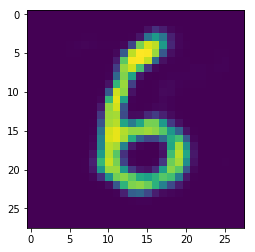

Step 29000, Loss: 0.014364
KL loss: 5.1934924
rec_loss: 0.009170773


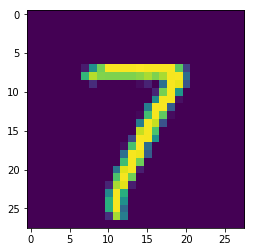

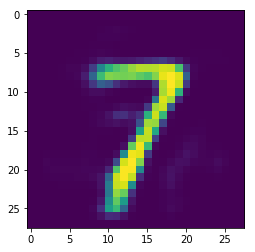

Step 30000, Loss: 0.014938
KL loss: 5.402265
rec_loss: 0.0095357485


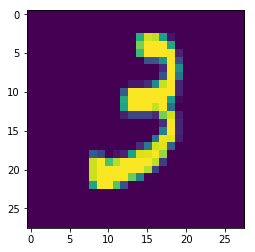

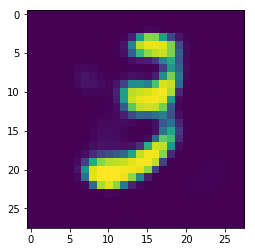

In [7]:
# Parameters
learning_rate = 0.001
num_steps = 30000
batch_size = 64

#Start session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)
        # Train
        feed_dict = {X: batch_x}
        _, l, KL, rec_loss = sess.run([learning, loss, KL_divergence, reconstruction_loss], feed_dict=feed_dict)
        if i % 1000 == 0 or i == 1:
            print('Step %i, Loss: %f' % (i, l))
            print('KL loss:', KL)
            print('rec_loss:', rec_loss)
         
            recon, origigi = sess.run([reconstructed_image, X], feed_dict = feed_dict)   
            plt.imshow(np.reshape(origigi[1], (28,28)))
            plt.show()
            plt.imshow(np.reshape(recon[1], (28,28)))
            plt.show()

    

In [8]:
batch_x, _ = mnist.train.next_batch(64)

In [9]:
batch_x.shape

(64, 784)

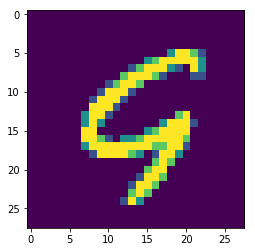

In [10]:
batch_x[1]
plt.imshow(np.reshape(batch_x[1],(28,28)))
plt.show()